In [6]:
import numpy as np
from numpy.linalg import norm as norm
def Linf(x):
    return norm(x,np.inf)
import matplotlib.pyplot as plt
plt.show()

In [7]:
def subA(A,tipo):
    # Esta funcion devuelve las matrices Lower, Diagonal y Upper (tipo= 1,2,3 respectivamente).
    dim = np.shape(A)
    n=dim[0]
    m=dim[1]
    res = np.zeros(dim)
    for i in  range(n):
        for j in range(m):
            if tipo==1:
                if i>j: res[i][j] = A[i][j]
            if tipo==2:
                if i==j: res[i][j] = A[i][j]
            if tipo==3:
                if i<j: res[i][j] = A[i][j]
    return np.array(res)

In [8]:
def jacobi(A,b,x0=None,n_iter=100,tol=0.001,verbose=False):
    
    A = np.array(A)
    b = np.array(b)
    nA,mA = np.shape(A)
    L=subA(A,1)
    D=subA(A,2)
    U=subA(A,3)
    if x0 == None:  x0=np.zeros(nA)
    x=[]
    x.append(np.array(x0))
    err=[10*tol]
    for n in range(n_iter):
        iteraciones=n
        xn = np.matmul( np.linalg.inv(D) , b - np.matmul( L+U  , x[n]) )
        x.append(np.array(xn))
        err.append( Linf( x[n+1] - x[n] ) / Linf(x[n])) 
        if verbose==True:
            print("n      =",n)
            print("x["+str(n+1)+"]   =",xn)
            print("err["+str(n)+"] =",err[n])
            print(".....")
        if n>0 and err[n] < tol:break
    return x, err, iteraciones

In [9]:
A=[[5,1,3],
   [1,3,1],
   [0,1,2]]
L=subA(A,1)
D=subA(A,2)
U=subA(A,3)

b=np.matmul(A,[0,3,4])

In [10]:
x, err, n = jacobi(A,b,verbose=True)

n      = 0
x[1]   = [3.         4.33333333 5.5       ]
err[0] = 0.01
.....
n      = 1
x[2]   = [-1.16666667  1.5         3.33333333]
err[1] = inf
.....
n      = 2
x[3]   = [0.7        3.61111111 4.75      ]
err[2] = 0.7575757575757575
.....
n      = 3
x[4]   = [-0.57222222  2.51666667  3.69444444]
err[3] = 0.6333333333333332
.....
n      = 4
x[5]   = [0.28       3.29259259 4.24166667]
err[4] = 0.2678362573099415
.....
n      = 5
x[6]   = [-0.20351852  2.82611111  3.8537037 ]
err[5] = 0.23067669172932323
.....
n      = 6
x[7]   = [0.12255556 3.11660494 4.08694444]
err[6] = 0.11399257803972923
.....
n      = 7
x[8]   = [-0.07548765  2.93016667  3.94169753]
err[7] = 0.08461316674675634
.....
n      = 8
x[9]   = [0.04894815 3.04459671 4.03491667]
err[8] = 0.04845752433599919
.....
n      = 9
x[10]   = [-0.02986934  2.97204506  3.97770165]
err[9] = 0.03156908958507883
.....
n      = 10
x[11]   = [0.01897    3.01738923 4.01397747]
err[10] = 0.01953385812476929
.....
n      = 11
x[12]   = [-0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


In [11]:
print(x[-1])

[-7.18597778e-04  2.99933618e+00  3.99947024e+00]


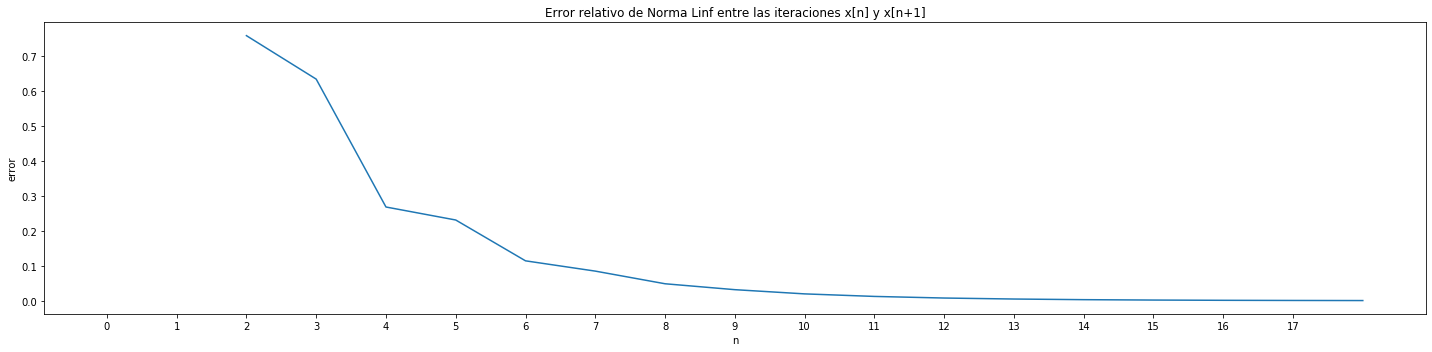

In [62]:
error_plot=plt.figure(figsize=(20,5))
ax = error_plot.add_subplot(111)
ax.plot(err)
ax.xaxis.set(ticks=range(n+1))
ax.set(title='Error relativo de Norma Linf entre las iteraciones x[n] y x[n+1]',xlabel='n',ylabel='error')
plt.tight_layout()

In [97]:
RQ = float(0.2)
MICROORGANISMO_CRECIMIENTO = [
                                [RQ, 0.0, 1.0, 1.0, 0.0, 2.0] , 
                                [1.0, 3.0, -1.0, -1.0, -1.0, -6.0] , 
                                [-1.0, -1.0, 20.0, 0.0, 2.0, 1.0] , 
                                [-1.0, -1.0, 0.0, 8.0, 4.0, 0.0] ,
                                [0.0, 0.0, 2.0, 0.0, 7.0, 5.0]
                            ]

In [98]:
def armar_sistema(A_sorted):
    A = []
    b = []
    for i in range(len(A_sorted)):
        cont = 0
        fila = []
        while cont < len(A_sorted[i])-1:
            fila.append(A_sorted[i][cont])
            cont += 1
        A.append(fila)
        b.append([A_sorted[i][cont]])
    return A,b

In [103]:
A=np.array(MICROORGANISMO_CRECIMIENTO)[:,:-1]

In [104]:
b=np.array(MICROORGANISMO_CRECIMIENTO)[:,-1]

In [105]:
x, err, n = jacobi(A,b,verbose=True)

n      = 0
x[1]   = [10.         -2.          0.05        0.          0.71428571]
err[0] = 0.01
.....
n      = 1
x[2]   = [ 9.75       -5.07857143  0.37857143  0.64285714  0.7       ]
err[1] = inf
.....
n      = 2
x[3]   = [ 4.89285714 -4.67619048  0.21357143  0.23392857  0.60612245]
err[2] = 0.30785714285714283
.....
n      = 3
x[4]   = [ 7.76250000e+00 -3.27974490e+00  2.21088435e-04 -2.75977891e-01
  6.53265306e-01]
err[3] = 0.4981684981684981
.....
n      = 4
x[5]   = [11.37878401 -4.46166383  0.20881122  0.23371173  0.71422255]
err[4] = 0.5864963503649634
.....
n      = 5
x[6]   = [ 7.7873852  -5.40734617  0.32443375  0.50752875  0.65462536]
err[5] = 0.4658658954725204
.....
n      = 6
x[7]   = [ 5.84018748 -4.10026578  0.10353942 -0.0298078   0.62159036]
err[6] = 0.31562237276229393
.....
n      = 7
x[8]   = [ 9.63134194 -3.71495517  0.07483705 -0.09330497  0.68470302]
err[7] = 0.2500451272536554
.....
n      = 8
x[9]   = [10.09233958 -4.98836894  0.27734904  0.39719683  0.692903

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


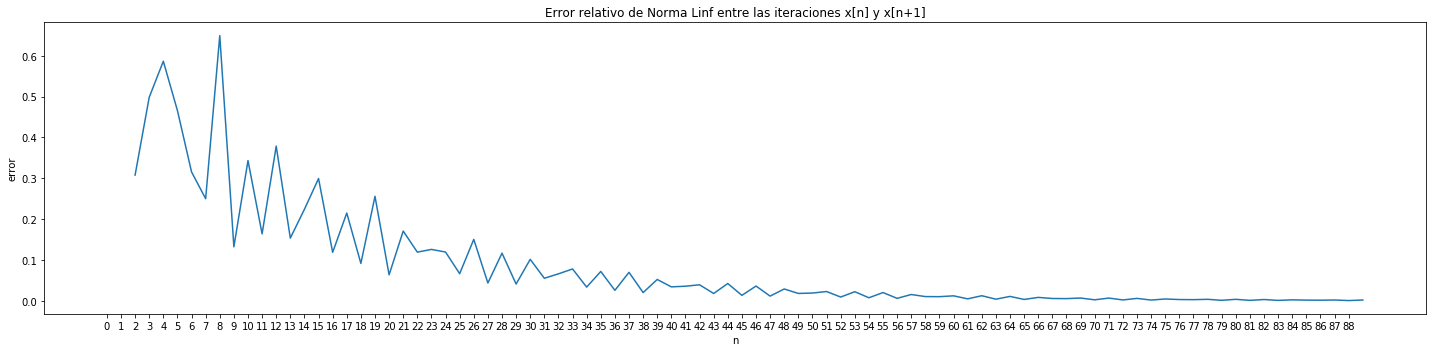

In [106]:
error_plot=plt.figure(figsize=(20,5))
ax = error_plot.add_subplot(111)
ax.plot(err)
ax.xaxis.set(ticks=range(n+1))
ax.set(title='Error relativo de Norma Linf entre las iteraciones x[n] y x[n+1]',xlabel='n',ylabel='error')
plt.tight_layout()